
# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*

*Daniel Bicák bicakd@natur.cuni.cz*

# Data Preprocessing

This notebook contains;
* Data Generation
* Data Scaling
* Principal Component Analysis
* Linear Regression Task

### Data Generation

This short block of code will generate data for which some preprocessing needs to be done. The data is purely artificial; they do not represent any real phenomena. The dataset contains 6 features. The first 4 features are somewhat correlated, the fifth does not correlate with the rest of the dataset. The last feature is categorical, consisting of two distinct categories. The dependent variable *y* has linear relationships with features. The relationship is represented by the following formula;
$$
y = 2 + -2x_{1} + 2x_{2} + 3x_{3} + 0.5x_{4} + 3x_{5} + x_{6} + \varepsilon \\

\textrm{if} \; x_{6} \; \textrm{is} \; \texttt{'Rural'} \to  2  \\ 
\textrm{if} \; x_{6} \; \textrm{is} \; \texttt{'Urban'} \to -5

$$

where $\varepsilon$ is random noise sampled from uniform distribution.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# parameters for multivariate distribution
mean = [0, 0, 0, 0]
cov = np.array([[1, 0.8, 0.6, 0.7],[0.8, 1, 0.7, 0.6],[0.6, 0.7, 1, 0.6], [0.8, 0.6, 0.7, 1]])
number_of_samples = 500

# generate random features with correlation
feature1_4 = np.random.multivariate_normal(mean, cov, number_of_samples)+2
# generate random uncorrelated features
feature5 = np.random.rand(number_of_samples, 1)*3
# generate categorical feature
feature6 = ['Rural', 'Urban']*int(number_of_samples/2)
random.shuffle(feature6)

# create a dependent variable y, which has linear relationship with features
y = 2 + -2*feature1_4[:, 0] + 2*feature1_4[:, 1] + 3*feature1_4[:, 2] + 0.5*feature1_4[:, 3] + 3*feature5[:, 0]

# add categorical variable
cat_number = {'Rural':2, 'Urban':-5}
cat_number_val = np.array([cat_number[x] for x in feature6])
y = y+cat_number_val

# add noise to dependent variable 
# noise has uniform distribution 
noise = (np.random.rand(500)-0.5)*7
y = y + noise

# stack continuous features into one array
features = np.hstack((feature1_4, feature5))
# categorical feature is in the list
features_cat = feature6

C:\Users\uzivatel\AppData\Local\Temp\ipykernel_14268\2769699095.py:11: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  feature1_4 = np.random.multivariate_normal(mean, cov, number_of_samples)+2


In [8]:
features.shape

(500, 6)

In [4]:
y

array([ 1.13517646e+01,  1.75285679e+01,  9.42134539e+00, -8.24815132e-01,
        8.31229761e+00,  1.83823586e+01, -1.84283315e+00,  1.06542543e+01,
        1.21553077e+01,  1.97545662e+01,  1.58547012e+01,  7.95641258e+00,
        2.40205175e+00,  1.80303928e+01, -7.95512944e-01,  6.80246470e+00,
        7.08100015e+00,  3.82853841e+00,  9.66721923e+00,  1.94711143e+01,
        5.55849058e+00,  1.96492237e+01,  8.29507176e+00,  6.45343117e+00,
        1.69744312e+01,  1.73611008e+00,  8.88641922e+00,  1.39186216e+01,
        8.20716226e+00,  8.25240176e+00,  1.68387611e+01,  1.81799550e+01,
        9.02117818e+00,  1.46523313e+01,  9.92023426e+00,  1.41515950e+01,
        1.18292512e+01,  2.42971277e+01,  1.27742123e+01,  7.89132895e+00,
        1.15520642e+01,  1.56932849e+01,  4.94217721e+00,  9.81023273e+00,
        4.04452765e+00,  6.20438716e+00,  1.43519869e+01,  1.49678982e+01,
        2.15433522e+01,  1.46448694e+01,  1.71593212e+01,  1.14727472e+01,
        1.11581551e+01,  

In [28]:
features

array([[3.74018054, 3.18262096, 3.71951095, ..., 1.81694362, 1.        ,
        1.        ],
       [1.81602083, 2.03166652, 1.59586146, ..., 2.3565534 , 0.        ,
        0.        ],
       [2.68009213, 2.37094881, 1.05168684, ..., 1.36946871, 0.        ,
        0.        ],
       ...,
       [2.95181603, 3.434123  , 4.36767032, ..., 2.54054534, 0.        ,
        0.        ],
       [1.24733364, 2.2966913 , 1.14343288, ..., 0.30864449, 0.        ,
        0.        ],
       [1.77094139, 1.92530153, 1.81841668, ..., 2.63064176, 0.        ,
        0.        ]])

## Encoding categorical values

Feature6 is categorical, use one-hot encoding to transform the feature.

In [10]:
# try to set 'Rural' value to 1 and 'Urban' to 0
# use simple loop or list comprehension
# loop
for value in features_cat:

    if value == "Rural":
        value = 1
    elif value == "Urban":
        value = 0

# list comprehension 
cat_number = {'Rural':1, 'Urban':0}
x = [x for x in features_cat]

# or try to find a better way

In [11]:
# you can also use scikit-learn encoder
from sklearn.preprocessing import LabelEncoder

classes = ['Rural', 'Urban']

le = LabelEncoder()
le.fit(classes)
feature6 = le.transform(features_cat)

In [12]:
# transform the encoded list into array
# scikit learn LabelEncoder transformed list already

if type(feature6) == list:

    feature6 = np.array(feature6)

features = np.hstack((features, feature6.reshape(-1,1)))

## Data exploration

Visual exploration of data is a critical step in the process of building machine learning models for several reasons. 
* Firstly, it allows data scientists to gain an intuitive understanding of the underlying structure and patterns within the data, which can inform feature selection and the choice of appropriate models. Visualizations such as scatter plots, histograms, and box plots can reveal distributions, outliers, and anomalies that may affect model performance. 
* Secondly, by identifying relationships and correlations between variables, practitioners can anticipate how different features might interact and influence predictions, potentially leading to the engineering of more informative features. Thirdly, visual exploration can help in diagnosing issues with data quality, such as missing values or incorrect data entries, which need to be addressed before training models. 
* Lastly, visualizations make it easier to communicate findings and insights to stakeholders who may not have a technical background, facilitating better collaboration and decision-making. In summary, visual data exploration is an indispensable tool that enhances the understanding, preparation, and effective use of data in machine learning.

Do a simple visual exploration of the dataset.

<Axes: title={'center': 'Correlation plot'}>

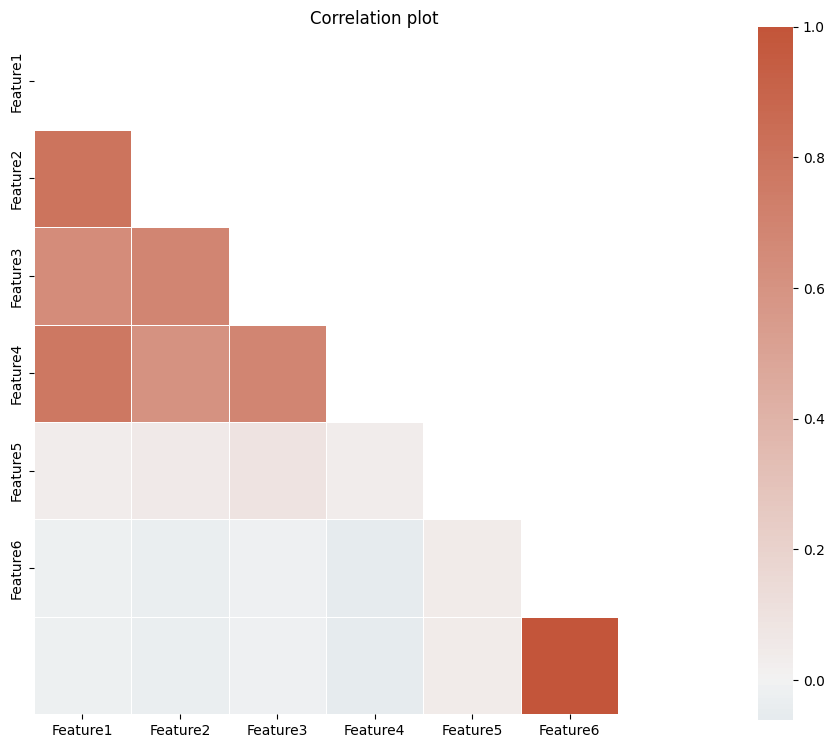

In [13]:
# seaborn library can do interesting visulization
import seaborn as sns

# for example correlation plot
# calculate correlation
correlation = np.corrcoef(features.T)
# create figure
figure, ax = plt.subplots(figsize=(11, 9))

feature_labels = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature6']
mask = np.triu(np.ones_like(correlation, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.set_title('Correlation plot')

# heat map
sns.heatmap(correlation, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, 
            xticklabels=feature_labels, yticklabels=feature_labels)

# you can find demo here
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

(array([ 5., 15., 32., 66., 90., 93., 92., 64., 30., 13.]),
 array([-5.86599699, -2.57008151,  0.72583398,  4.02174946,  7.31766494,
        10.61358043, 13.90949591, 17.2054114 , 20.50132688, 23.79724237,
        27.09315785]),
 <BarContainer object of 10 artists>)

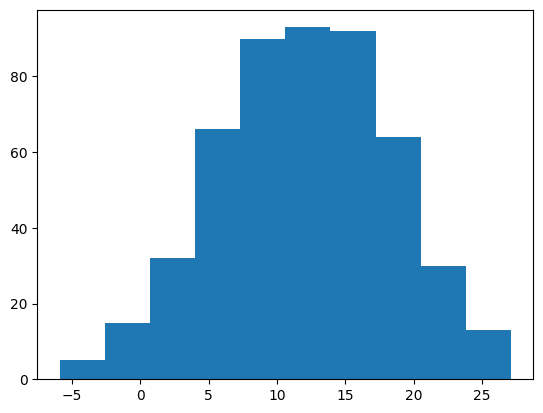

In [14]:
# do a simple visual exploration with matplotlib
# show a histogram for dependet variable y

plt.hist(y)

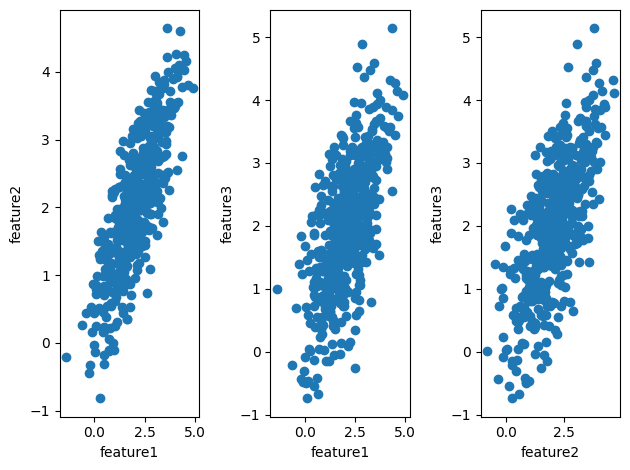

In [22]:
# scatter plot for feature1 with feature2 and feature3 

plt.subplot(1,3,1)
plt.scatter(features[:,0],features[:,1])
plt.xlabel("feature1")
plt.ylabel("feature2")
plt.subplot(1,3,2)
plt.scatter(features[:,0],features[:,2])
plt.xlabel("feature1")
plt.ylabel("feature3")
plt.subplot(1,3,3)
plt.scatter(features[:,1],features[:,2])
plt.xlabel("feature2")
plt.ylabel("feature3")
plt.tight_layout()

Text(0, 0.5, 'feature2')

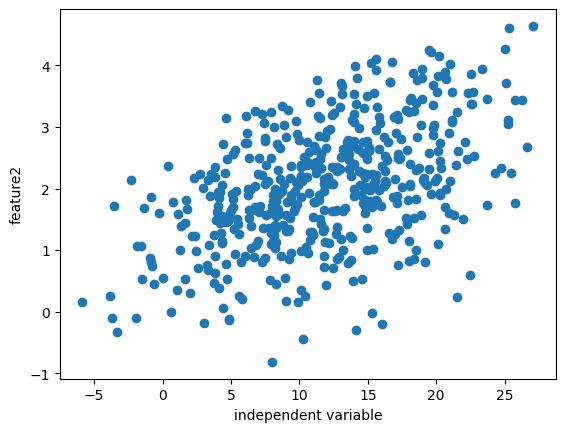

In [24]:
# scatter plot for dependent variable and features of your choice
feature = 1
plt.scatter(y, features[:,feature])
plt.xlabel("independent variable")
plt.ylabel(f"feature{feature+1}")

## Data Scaling

In [35]:
import numpy as np

In [44]:
# write a min-max scaling function

def min_max_scaling(features, min=0, max=1):
    fmin = features.min(axis=0)
    fmax = features.max(axis=0)

    
    scaled_features = fmin + (((features-min)*(fmax-fmin)) / (max-min))
    
    return scaled_features

In [45]:
# write a standard scaling function

def standard_scaling(features):
    fmean = np.mean(features, axis=0)
    fstd = np.std(features, axis=0)

    scaled_features = (features - fmean) / fstd
    
    return scaled_features

In [46]:
# scale all features
min_max_features = min_max_scaling(features)
std_features = standard_scaling(features)

In [42]:
# compare results to scikit-learn scalers
# MinMax scaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(features)

features_min_max_scaled = min_max_scaler.transform(features)

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(features)

features_min_max_scaled = min_max_scaler.transform(features)

# Standard Scaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(features)

features_standard_scaled = std_scaler.transform(features)

In [47]:
print(f"min_max: {min_max_features}")
print(f"min max scaler: {features_min_max_scaled}")
print(f"std: {std_features}")
print(f"std scaler: {features_standard_scaled}")

min_max: [[22.24340559 16.55409657 21.12361445 ...  5.43441319  1.
   1.        ]
 [10.07313221 10.27233191  8.64001086 ...  7.04572098  0.
   0.        ]
 [15.53836663 12.12409202  5.44114948 ...  4.09822577  0.
   0.        ]
 ...
 [17.25701511 17.92676312 24.93373692 ...  7.59513214  0.
   0.        ]
 [ 6.47619663 11.71880387  5.98046691 ...  0.93053986  0.
   0.        ]
 [ 9.78800563  9.69180519  9.9482734  ...  7.86416555  0.
   0.        ]]
min max scaler: [[0.81476062 0.73267893 0.75881012 ... 0.60549165 1.         1.        ]
 [0.51054473 0.52179931 0.39754528 ... 0.78620121 0.         0.        ]
 [0.6471572  0.58396313 0.30497296 ... 0.45563708 0.         0.        ]
 ...
 [0.69011763 0.77875952 0.86907182 ... 0.84781815 0.         0.        ]
 [0.42063344 0.57035755 0.32058034 ... 0.10037837 0.         0.        ]
 [0.50341752 0.50231096 0.43540528 ... 0.87799048 0.         0.        ]]
std: [[ 1.65895906  1.17424312  1.67385518 ...  0.37236324  1.
   1.        ]
 [-0.2270

## Principal Component Analysis

In [51]:
# select data, which are suitable for transformation

features_pca = features[:, ]

# 1.
# if data are not scaled, scale them with standard scaling
features_pca_scaled = std_scaler.transform(features_pca)

# 2.
# calculate the covariance matrix
# use numpy cov function or multiplication according to formula
# https://numpy.org/doc/stable/reference/generated/numpy.cov.html

cov_matrix = np.cov(features_pca_scaled.T)

# 3.
# calculate eigenvectors and eigen values 
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html 

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 4. 
# 
# 

idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]


# 5.
# select top k eigenvectors (principal components)


In [49]:
eigenvalues

array([ 2.06408625e+02+0.00000000e+00j,  9.40467696e+01+0.00000000e+00j,
        3.32175951e+01+0.00000000e+00j,  3.08751376e+01+0.00000000e+00j,
        1.03027808e+01+0.00000000e+00j,  7.65788355e-15+0.00000000e+00j,
        5.96422835e-15+1.67667821e-15j,  5.96422835e-15-1.67667821e-15j,
        5.88350547e-15+4.67454670e-15j,  5.88350547e-15-4.67454670e-15j,
        5.82325151e-15+3.76120877e-15j,  5.82325151e-15-3.76120877e-15j,
        4.15725052e-15+8.32906074e-16j,  4.15725052e-15-8.32906074e-16j,
        4.01795321e-15+5.18728621e-15j,  4.01795321e-15-5.18728621e-15j,
        3.18794083e-15+0.00000000e+00j,  3.15190034e-15+6.27326307e-15j,
        3.15190034e-15-6.27326307e-15j,  3.07186621e-15+4.07151356e-16j,
        3.07186621e-15-4.07151356e-16j,  3.04675387e-15+1.58559335e-15j,
        3.04675387e-15-1.58559335e-15j,  2.88948730e-15+0.00000000e+00j,
        2.68919218e-15+0.00000000e+00j,  2.59135840e-15+6.20742606e-16j,
        2.59135840e-15-6.20742606e-16j,  2.56100314

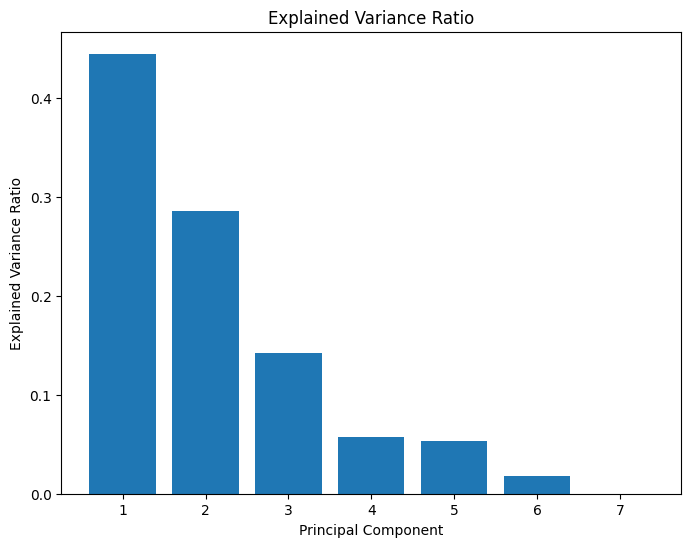

In [52]:
# 5. 
# select top k eigenvectors (principal components)
# how to know which one?
# we can plot the eigenvalues

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

# Plot the explained variance
plt.figure(figsize=(8,6))
plt.bar(range(1,len(explained_variance_ratio) +1), explained_variance_ratio)
plt.title('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [53]:
top_pc_select = 2

eigenvectors = eigenvectors[:, :top_pc_select]

# 6. 
# Normalize to component
pc = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# 7.
# transform data
features_transformed = features_pca.dot(pc)

In [ ]:
# or use existing tool from scikit-learn
from sklearn.decomposition import PCA

# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html


## Linear Model 

In [ ]:
# Create a Linear Regression model
# fit the transformed data (PCA) and non-transformed data
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# find out, which data perform better


*That will be all. Have a nice day.*